<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/ImagesWithSpecificExposures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating images with specific exposures

To create images with specific exposures manually from a single base image. This involves adjusting the brightness or gamma of the image to mimic the effect of different exposure times.

In [1]:
#importing necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

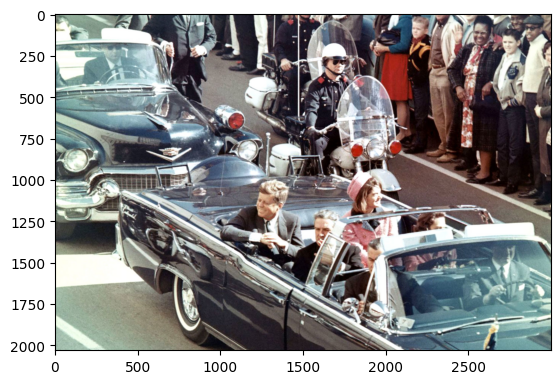

In [2]:
base_image = cv2.imread("/content/drive/MyDrive/AbelFolder/jfk.jpg")
plt.imshow(base_image[:, :, ::-1])

## Adjust brightness to stimulate different exposures

Using gamma correction to stimulate different exposure levels. The exposure times can be converted into corresponding gamma values, but since the exact relationship between exposure time and gamma is complex, so using an approximation where shorter exposure times result in darker images and longer exposure times result in brighter images.

In [3]:
#creating function to adjust_gamma
def adjust_gamma(image, gamma):
  inv_gamma = 1.0 / gamma
  table = np.array([((i/255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
  return cv2.LUT(image, table)

In [4]:
#stimulating different exposure times
exposure_033 = adjust_gamma(base_image, 0.25) #stimulate underexposed (darker)
exposure_025 = adjust_gamma(base_image, 0.5)
exposure_05 = adjust_gamma(base_image, 0.8)
exposure_15 = adjust_gamma(base_image, 1.5)#stimulate overexposed (brighter)

In [6]:
import math

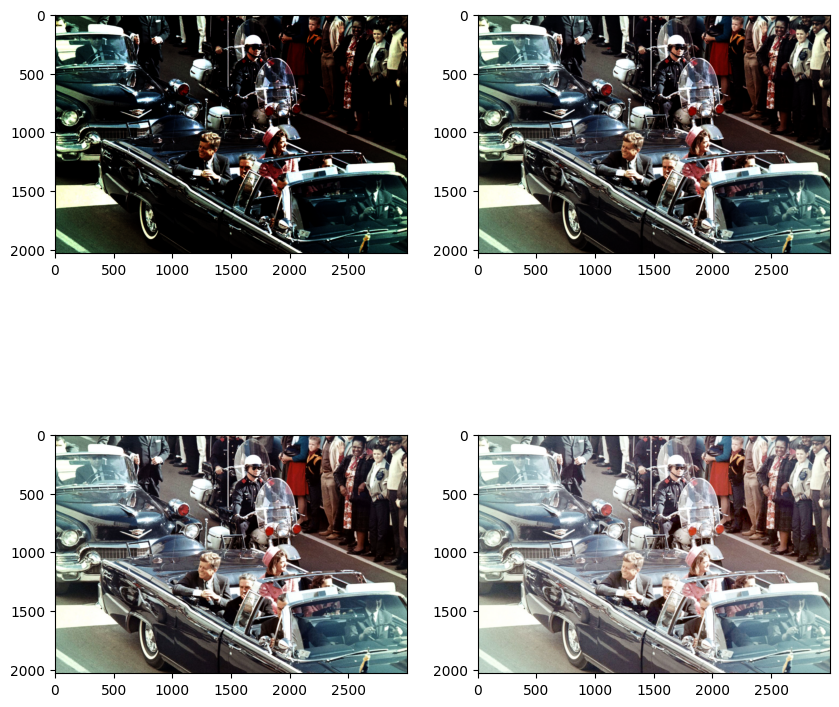

In [8]:
#showing the images on a single figure
images = [exposure_033, exposure_025, exposure_05, exposure_15]
plt.figure(figsize=[10, 10])
num_cols = 2
num_rows = math.ceil(4/num_cols)
for i in range(len(images)):
  plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(images[i][:, :, ::-1])

### Notes:
- The gamma values used here (0.25, 0.5, 0.8, 1.5) are approximations to stimulate underexposure and overexposure. Need to tweak these values to get the desired effect.
- If the base image is already overexposed or underexposed, need to adjust the gamma values accordingly